In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [21]:
df = pd.read_csv('covid_19_clean_complete.csv')

In [22]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [23]:
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

df.head(10)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [24]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df.head(10)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [26]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [27]:
df2.head(10)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,missing_value,Afghanistan,33.9391,67.71,2020-01-22,0,0,0,0,Eastern Mediterranean
1,missing_value,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,missing_value,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,missing_value,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,missing_value,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa
5,missing_value,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0,0,0,0,Americas
6,missing_value,Argentina,-38.4161,-63.6167,2020-01-22,0,0,0,0,Americas
7,missing_value,Armenia,40.0691,45.0382,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.4735,149.012,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.8688,151.209,2020-01-22,0,0,0,0,Western Pacific


In [28]:
df3 = df2.groupby(['Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

df3.head(10)

,Date,Country,Confirmed,Deaths,Recovered
0,2020-01-22,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,555,17,28
1,2020-01-23,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,654,18,30
2,2020-01-24,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,941,26,36
3,2020-01-25,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,1434,42,39
4,2020-01-26,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,2118,56,52
5,2020-01-27,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,2927,82,61
6,2020-01-28,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5578,131,107
7,2020-01-29,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,6166,133,125
8,2020-01-30,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,8234,171,141
9,2020-01-31,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,9927,213,219


In [29]:
df4 = df2.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

df4.head(10)

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
5,Afghanistan,2020-01-27,0,0,0
6,Afghanistan,2020-01-28,0,0,0
7,Afghanistan,2020-01-29,0,0,0
8,Afghanistan,2020-01-30,0,0,0
9,Afghanistan,2020-01-31,0,0,0


In [30]:
countries = df4['Country'].unique()
len(countries)

187

In [31]:
df5 = df2.groupby(['Country'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

df5.head(10)

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,1936390,49098,798240
1,Albania,196702,5708,118877
2,Algeria,1179755,77972,755897
3,Andorra,94404,5423,69074
4,Angola,22662,1078,6573
5,Antigua and Barbuda,4487,326,2600
6,Argentina,4450658,97749,1680024
7,Armenia,1587173,27089,857482
8,Australia,960247,11387,711928
9,Austria,2034986,71390,1638380


In [32]:
df5

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,1936390,49098,798240
1,Albania,196702,5708,118877
2,Algeria,1179755,77972,755897
3,Andorra,94404,5423,69074
4,Angola,22662,1078,6573
...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124
183,Western Sahara,901,63,648
184,Yemen,67180,17707,23779
185,Zambia,129421,2643,83611


In [34]:
df6 = df2.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

df6.head(10)

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52
5,2020-01-27,2927,82,61
6,2020-01-28,5578,131,107
7,2020-01-29,6166,133,125
8,2020-01-30,8234,171,141
9,2020-01-31,9927,213,219


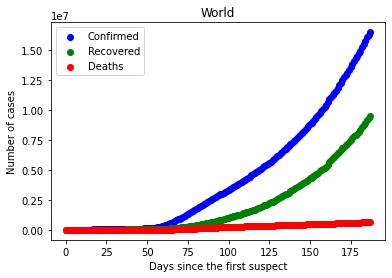

In [35]:
C = df6
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()